In [1]:
import json
import codecs

In [2]:
import pandas as pd
import os
import regex as re

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [4]:
import python.dataset_analysis
from python.load import *
import json

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:740: FutureWarning: Possible nested set at position 8
  re.IGNORECASE | re.VERBOSE)
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:2044: FutureWarning: Possible nested set at position 152
  re.VERBOSE | re.IGNORECASE)
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)


### Seleccion del corpus NEWSQA

In [17]:
DATASET_ROUTE = r'C:\Users\larao_000\Desktop\TFM\jupyter\newsqa\newsqa-master\newsqa-master\maluuba\newsqa/'

In [18]:
NEWSQA_TRAIN = DATASET_ROUTE + '/train_story_ids.csv'
NEWSQA_DEV = DATASET_ROUTE + '/dev_story_ids.csv'
NEWSQA_TEST = DATASET_ROUTE + '/test_story_ids.csv'

In [19]:
DATASET = r'C:\Users\larao_000\Desktop\TFM\jupyter\newsqa\cnn_stories\cnn\stories'
FILE_XLSX = r'C:\Users\larao_000\Desktop\TFM\jupyter\newsqa\newsqa-data-v1.csv' #'SQUAD-train_queries.xlsx' #'SQUAD-dev_queries.xlsx'

In [20]:
newsqa_df = pd.read_csv(FILE_XLSX)

In [21]:
newsqa_dev = pd.read_csv(NEWSQA_DEV)
newsqa_train = pd.read_csv(NEWSQA_TRAIN)
newsqa_test = pd.read_csv(NEWSQA_TEST)

In [22]:
dirname = DATASET_ROUTE
stories_requiring_extra_newline = pd.read_csv(os.path.join(dirname, 'stories_requiring_extra_newline.csv'))
stories_requiring_two_extra_newlines = pd.read_csv(os.path.join(dirname, 'stories_requiring_two_extra_newlines.csv'))
stories_to_decode_specially = pd.read_csv(os.path.join(dirname, 'stories_to_decode_specially.csv'))

stories_to_decode_specially['story_id'] = stories_to_decode_specially['story_id'].apply(lambda x: x.split('/')[-1].replace('\r',''))
stories_requiring_two_extra_newlines['story_id'] = stories_requiring_two_extra_newlines['story_id'].apply(lambda x: x.split('/')[-1].replace('\r',''))
stories_requiring_extra_newline['story_id'] = stories_requiring_extra_newline['story_id'].apply(lambda x: x.split('/')[-1].replace('\r',''))

In [23]:
stories_requiring_extra_newline.head()

story_id
0  002a083c3893b1fde734280b9eec28d428a02d2b.story
1  0032d07e91b8ce3d5f8ac313d799341df7556234.story
2  0033829349643e2964a8c3ce5fd997116ce43f7c.story
3  0036c48d80c270465bffced3e233fe39e5950431.story
4  00377ab9d3caafb18464c47d0535ae2781aeef15.story

In [24]:
stories_to_decode_specially = stories_to_decode_specially['story_id'].tolist()
stories_requiring_two_extra_newlines = stories_requiring_two_extra_newlines['story_id'].tolist()
stories_requiring_extra_newline = stories_requiring_extra_newline['story_id'].tolist()

In [25]:
import six
def preprocess_story(story_id, story_text, stories_requiring_extra_newline=stories_requiring_extra_newline, 
               stories_requiring_two_extra_newlines=stories_requiring_two_extra_newlines, 
               stories_to_decode_specially=stories_to_decode_specially):
    
    story_text = story_text.replace(u'\xe2\x80\xa2', u'\xe2\u20ac\xa2')
    story_text = story_text.replace(u'\xe2\x82\xac', u'\xe2\u201a\xac')
    story_text = story_text.replace('\r', '\n')
    story_lines = story_text.split('\n')
    
    if story_id in stories_to_decode_specially:
        story_text = u"".join(six.unichr(ord(c)) for c in story_text.strip())
    if story_id in stories_requiring_two_extra_newlines:
        story_text = '   '.join(story_lines)
    elif story_id in stories_requiring_extra_newline:
        story_text = '  '.join(story_lines)
    else:
        story_text = ' '.join(story_lines)
        
    return story_text

In [26]:
newsqa_df['story_id'] = newsqa_df['story_id'].apply(lambda x: x.split('/')[-1])
newsqa_dev['story_id'] = newsqa_dev['story_id'].apply(lambda x: x.split('/')[-1])
newsqa_test['story_id'] = newsqa_test['story_id'].apply(lambda x: x.split('/')[-1])
newsqa_train['story_id'] = newsqa_train['story_id'].apply(lambda x: x.split('/')[-1])

In [27]:
print(len(newsqa_dev))
print(len(newsqa_test))
print(len(newsqa_train))

638
637
11469


In [384]:
# id;query;answer;impossible;plausible;dataset;context;
# foco;query_ner;context_ner;answer_ner;query_pos;answer_pos;plausible_pos;context_pos;
# csarron/roberta-base-squad-v1;csarron/bert-base-uncased-squad-v1;phiyodr/roberta-large-finetuned-squad2;deepset/roberta-base-squad2;phiyodr/bert-base-finetuned-squad2;phiyodr/bert-large-finetuned-squad2;valhalla/t5-base-squad

In [28]:
for file in newsqa_test['story_id'].unique():
    #print(file)
    newsqa_df.loc[newsqa_df['story_id']==file, 'dataset'] = 'test'
    with codecs.open(DATASET+'/'+file, 'r', encoding='latin-1') as story_file:
        content_story = preprocess_story(file, story_file.read())
        newsqa_df.loc[newsqa_df['story_id']==file, 'context'] = content_story

In [29]:
for file in newsqa_dev['story_id'].unique():
    #print(file)
    newsqa_df.loc[newsqa_df['story_id']==file, 'dataset'] = 'dev'
    with codecs.open(DATASET+'/'+file, 'r', encoding='latin-1') as story_file:
        content_story = preprocess_story(file, story_file.read())
        newsqa_df.loc[newsqa_df['story_id']==file, 'context'] = content_story

In [30]:
newsqa_df.loc[newsqa_df['dataset'] == 'dev'].head(2)

story_id  \
8   d191e20468fc7675fcfa55c33fab1e65405740a0.story   
76  6e8382e61be49c936e00a8eea24377a687622967.story   

                                    question answer_char_ranges  \
8                       Iran criticizes who?   68:97|63:97|None   
76  What should you do with your own videos?          None|None   

    is_answer_absent is_question_bad validated_answers dataset  \
8           0.333333             0.0      {"63:97": 2}     dev   
76          0.500000             0.5               NaN     dev   

                                              context  
8   TEHRAN, Iran (CNN) -- Iran's parliament speake...  
76  (CNN) -- What could be more powerful than the ...

In [31]:
for file in newsqa_train['story_id'].unique():
    newsqa_df.loc[newsqa_df['story_id']==file, 'dataset'] = 'train'
    with codecs.open(DATASET+'/'+file, 'r', encoding='latin-1') as story_file:
        content_story = preprocess_story(file, story_file.read())
        newsqa_df.loc[newsqa_df['story_id']==file, 'context'] = content_story

In [32]:
newsqa_df.loc[newsqa_df['dataset'] == 'train'].head(2)

story_id  \
0  42d01e187213e86f5fe617fe32e716ff7fa3afc4.story   
1  c48228a52f26aca65c31fad273e66164f047f292.story   

                                    question     answer_char_ranges  \
0  What was the amount of children murdered?      294:297|None|None   
1             Where was one employee killed?  34:60|1610:1618|34:60   

   is_answer_absent is_question_bad          validated_answers dataset  \
0               0.0             0.0  {"none": 1, "294:297": 2}   train   
1               0.0             0.0                        NaN   train   

                                             context  
0  NEW DELHI, India (CNN) -- A high court in nort...  
1  (CNN) -- Fighting in the volatile Sudanese reg...

In [33]:
import json
import regex as re

In [34]:
def definitive_answer(answer_char_ranges, validated_answers, context_str):
    final_answer = ''
    final_plausible = ''
    valid_answers_dict = dict()
    
    if validated_answers and str(validated_answers) != 'NaN':
        valid_answers_dict = json.loads(validated_answers)
    elif answer_char_ranges:
        valid_answers = [x for x in answer_char_ranges.split('|') if x != 'None']
        valid_counts = [valid_answers.count(x) for x in valid_answers]
        valid_answers_dict = dict(zip(valid_answers, valid_counts))   

    # multiple fragments: 57:63,67:70|None|57:63,67:70 
    if len(valid_answers_dict.keys()) > 0:
        new_keys = []
        new_values = []
        for key_str in valid_answers_dict.keys():
            multiple = key_str.split(',')
            offsets = []
            if len(multiple) > 1:
                for offset_str in multiple:
                    offsets += [int(x) for x in offset_str.split(':')]
                new_keys.append(str(min(offsets))+':'+str(max(offsets)))
                new_values.append(valid_answers_dict[key_str])
            else:
                new_keys.append(key_str)
                new_values.append(valid_answers_dict[key_str])
        valid_answer_common = dict(zip(new_keys, new_values))
   
    if len(valid_answers_dict.keys()) > 0:
        valid_answer_common = sorted(valid_answers_dict, key=valid_answers_dict.get, reverse=True)[0]
        valid_answer_common = [int(x) for x in valid_answer_common.split(':') if x!= 'none' and x!= 'bad_question' and ',' not in x]
        if len(valid_answer_common) == 2:
            final_answer = context_str[valid_answer_common[0]:valid_answer_common[1]].strip()
        
    if len(valid_answers_dict.keys()) > 1:
        valid_plausible_common = sorted(valid_answers_dict, key=valid_answers_dict.get, reverse=True)[1]
        if not 'none' in valid_plausible_common:
            valid_plausible_common = [int(x) for x in valid_plausible_common.split(':') if x!= 'none' and x!= 'bad_question' and ',' not in x]
            if len(valid_plausible_common) == 2:
                final_plausible = context_str[valid_plausible_common[0]:valid_plausible_common[1]].strip()

    return final_answer, final_plausible

In [35]:
print(newsqa_df['question'][0])
definitive_answer(newsqa_df['answer_char_ranges'][0], newsqa_df['validated_answers'][0], 
                  preprocess_story(newsqa_df['story_id'][0], newsqa_df['context'][0]))

What was the amount of children murdered?


('19', '')

In [36]:
newsqa_df['answer_char_ranges'] = newsqa_df['answer_char_ranges'].fillna('')
newsqa_df['validated_answers'] = newsqa_df['validated_answers'].fillna('')
newsqa_df['context'] = newsqa_df['context'].fillna('')

In [37]:
print(newsqa_df['question'][1])
definitive_answer(newsqa_df['answer_char_ranges'][1], newsqa_df['validated_answers'][1], newsqa_df['context'][1])

Where was one employee killed?


('Sudanese region of Darfur', 'Seleia,')

In [38]:
newsqa_df['answer'] = newsqa_df[['answer_char_ranges', 'validated_answers', 'context']].apply(lambda x: definitive_answer(x[0], x[1], x[2])[0], axis=1)
newsqa_df['plausible'] = newsqa_df[['answer_char_ranges', 'validated_answers', 'context']].apply(lambda x: definitive_answer(x[0], x[1], x[2])[1], axis=1)

In [39]:
newsqa_df['id'] = newsqa_df.index.astype(str) + '-' + newsqa_df['story_id']
newsqa_df['query'] = newsqa_df['question']

In [40]:
newsqa_df['is_answer_absent'] = newsqa_df['is_answer_absent'].astype(float)

In [41]:
newsqa_df['is_question_bad_2'] = newsqa_df['is_question_bad'].apply(lambda x: x.replace('?','0.1'))
newsqa_df['is_question_bad_2'].value_counts()
newsqa_df['is_question_bad_2'] = newsqa_df['is_question_bad_2'].astype(float)

In [44]:
newsqa_df['impossible'] = (newsqa_df['is_answer_absent'] + newsqa_df['is_question_bad_2']) > 0

In [45]:
newsqa_df.head(2)

story_id  \
0  42d01e187213e86f5fe617fe32e716ff7fa3afc4.story   
1  c48228a52f26aca65c31fad273e66164f047f292.story   

                                    question     answer_char_ranges  \
0  What was the amount of children murdered?      294:297|None|None   
1             Where was one employee killed?  34:60|1610:1618|34:60   

   is_answer_absent is_question_bad          validated_answers dataset  \
0               0.0             0.0  {"none": 1, "294:297": 2}   train   
1               0.0             0.0                              train   

                                             context  \
0  NEW DELHI, India (CNN) -- A high court in nort...   
1  (CNN) -- Fighting in the volatile Sudanese reg...   

                      answer plausible  \
0                         19             
1  Sudanese region of Darfur   Seleia,   

                                                 id  \
0  0-42d01e187213e86f5fe617fe32e716ff7fa3afc4.story   
1  1-c48228a52f26aca65c31fad273e66164f047f292.story   

                                       query  is_question_bad_2  impossible  
0  What was the amount of children murdered?                0.0       False  
1             Where was one employee killed?                0.0       False

In [46]:
newsqa_df['impossible'].value_counts()

False    63672
True     55961
Name: impossible, dtype: int64

In [47]:
newsqa_df.to_excel('NEWSQA.xlsx', index=False)

# PLN

In [3]:
newsqa_df = pd.read_excel('NEWSQA.xlsx')

### POSTagging

In [48]:
# https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/
import treetaggerwrapper

In [49]:
tagger = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR='C:\\Users\\larao_000\\Documents\\nlp\\tree-tagger-windows-3.2.3\\TreeTagger\\')

In [50]:
def pos_tagging(text, max_length=1000):
    results = []
    for i in range(0, len(text), max_length):
        partial_text = text[i:i+max_length]
        tags = tagger.tag_text(partial_text)
        results += treetaggerwrapper.make_tags(tags)
    return results

In [51]:
newsqa_df['query_pos'] = None
newsqa_df['answer_pos'] = None
newsqa_df['plausible_pos'] = None
newsqa_df['context_pos'] = None

In [52]:
newsqa_df['query'] = newsqa_df['query'].fillna('')
newsqa_df['answer'] = newsqa_df['answer'].fillna('')
newsqa_df['plausible'] = newsqa_df['plausible'].fillna('')
newsqa_df['context'] = newsqa_df['context'].fillna('')

In [53]:
print(newsqa_df['query'][0])
print(tagger.tag_text(newsqa_df['query'][0]))
print(pos_tagging(newsqa_df['query'][0]))

What was the amount of children murdered?
['What\tWP\twhat', 'was\tVBD\tbe', 'the\tDT\tthe', 'amount\tNN\tamount', 'of\tIN\tof', 'children\tNNS\tchild', 'murdered\tVVN\tmurder', '?\tSENT\t?']
[Tag(word='What', pos='WP', lemma='what'), Tag(word='was', pos='VBD', lemma='be'), Tag(word='the', pos='DT', lemma='the'), Tag(word='amount', pos='NN', lemma='amount'), Tag(word='of', pos='IN', lemma='of'), Tag(word='children', pos='NNS', lemma='child'), Tag(word='murdered', pos='VVN', lemma='murder'), Tag(word='?', pos='SENT', lemma='?')]


In [54]:
newsqa_df['query_pos'] = newsqa_df['query'].apply(lambda x: treetaggerwrapper.make_tags(tagger.tag_text(x)))

In [55]:
newsqa_df['answer_pos'] = newsqa_df['answer'].apply(lambda x: treetaggerwrapper.make_tags(tagger.tag_text(x)))

In [56]:
newsqa_df['plausible_pos'] = newsqa_df['plausible'].apply(lambda x: treetaggerwrapper.make_tags(tagger.tag_text(x)))

In [1]:
context_list = newsqa_df.loc[newsqa_df['context_pos'].isna(), 'context'].unique()
for context in context_list:
    #print(len(newsqa_df.loc[newsqa_df['context'] == context, 'context_pos']))
    ner_values = pos_tagging(context)
    newsqa_df.loc[newsqa_df['context'] == context, 'context_pos'] = str(ner_values)
    #print(sum(newsqa_df['context_pos'].isna()))

In [58]:
informe_pd = newsqa_df[['id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_pos', 'answer_pos','plausible_pos', 'context_pos']] 

In [59]:
informe_pd.to_excel('POS-NEWSQA-all.xlsx', index=False)

### NER Stanford

In [60]:
from stanfordcorenlp import StanfordCoreNLP

In [61]:
# https://www.khalidalnajjar.com/setup-use-stanford-corenlp-server-python/
# https://stanfordnlp.github.io/CoreNLP/index.html#download
# https://stanfordnlp.github.io/stanfordnlp/corenlp_client.html
nlp = StanfordCoreNLP('http://localhost', port=9000, timeout=30000)
props = {'annotators': 'tokenize,ssplit,pos,lemma,ner,parse,depparse,dcoref,relation',
          'pipelineLanguage': 'en',
          'outputFormat': 'json'
        }

In [62]:
import re
def preprocess_text(text_str):
    regular_expr = re.compile('\n|\r|\t|\(|\)|\[|\]|:|\,|\;|"|\?|\-|\%')
    text_str = re.sub(regular_expr, ' ', text_str)
    token_list = text_str.split(' ')
    token_list = [element for element in token_list if element]
    return ' '.join(token_list)

In [63]:
def filter_ner_relevant(tuple_list):
    ner_dictionary = {}
    previous_ner = 'O'
    for element in tuple_list:
        if element[1] != 'O':
            if element[1] == previous_ner:
                ner_dictionary[element[1]][-1] += ' ' + element[0]
            elif element[1] in ner_dictionary.keys():
                ner_dictionary[element[1]].append(element[0])
            else:
                ner_dictionary[element[1]] = [element[0]]    
        previous_ner = element[1]
    return ner_dictionary

In [64]:
queries_pd = newsqa_df

In [65]:
queries_pd['query_processed'] = queries_pd['query'].apply(preprocess_text)

In [66]:
queries_pd['query_ner'] = queries_pd['query_processed'].apply(nlp.ner)

In [67]:
queries_pd['query_ner'] = queries_pd['query_ner'].apply(filter_ner_relevant)

In [68]:
queries_pd['context_proc'] = queries_pd['context'].apply(preprocess_text)

In [2]:
print(len(queries_pd['context_ner'].isna()))
for context in queries_pd['context_proc'].unique():
    #print(len(queries_pd.loc[queries_pd['context_proc'] == context, 'context_ner']))
    ner_values = filter_ner_relevant(nlp.ner(context))
    queries_pd.loc[queries_pd['context_proc'] == context, 'context_ner'] = str(ner_values)
    #print(sum(queries_pd['context_ner'].isna()))

In [70]:
#queries_pd.head()

In [71]:
queries_pd['answer_processed'] = queries_pd['answer'].apply(preprocess_text)

In [72]:
queries_pd['answer_ner'] = queries_pd['answer_processed'].apply(nlp.ner)

In [73]:
queries_pd['answer_ner'] = queries_pd['answer_ner'].apply(filter_ner_relevant)

In [86]:
queries_pd['plausible_processed'] = queries_pd['plausible'].apply(preprocess_text)

In [87]:
queries_pd['plausible_ner'] = queries_pd['plausible_processed'].apply(nlp.ner)

In [88]:
queries_pd['plausible_ner'] = queries_pd['plausible_ner'].apply(filter_ner_relevant)

In [89]:
queries_pd.columns

Index(['story_id', 'question', 'answer_char_ranges', 'is_answer_absent',
       'is_question_bad', 'validated_answers', 'dataset', 'context', 'answer',
       'plausible', 'id', 'query', 'is_question_bad_2', 'impossible',
       'query_pos', 'answer_pos', 'plausible_pos', 'context_pos',
       'query_processed', 'query_ner', 'context_proc', 'context_ner',
       'answer_processed', 'answer_ner', 'plausible_processed',
       'plausible_ner'],
      dtype='object')

In [90]:
informe_pd = queries_pd[['id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'context_ner', 'answer_ner', 'plausible_ner',
                      'query_pos',  'answer_pos','plausible_pos', 'context_pos'  ]] 

In [91]:
informe_pd.to_excel('NER-POS-NEWSQA-queries.xlsx', index=False)

### Obtener foco de la pregunta 

In [12]:
queries_pd = pd.read_excel('BERT-NER-POS-F-NEWSQA-ftunNEWSQA-ftunSQUAD.xlsx')

In [13]:
queries_pd['query_pos'] = queries_pd['query_pos'].astype(str)

In [14]:
print(get_word_pos(queries_pd['query_pos'].values[0]))
print(get_pos(queries_pd['query_pos'][0]))
obtener_foco(get_word_pos(queries_pd['query_pos'][0]), get_pos(queries_pd['query_pos'][0]))

['What', 'was', 'the', 'amount', 'of', 'children', 'murdered', '']
['WP', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'VVN', 'SENT']


'amount'

In [15]:
queries_pd['foco'] = queries_pd.apply(lambda x: obtener_foco(get_word_pos(x['query_pos']), get_pos(x['query_pos'])), axis=1)

In [16]:
queries_pd.loc[queries_pd['foco'] == '', 'query_pos']

239       [Tag(word='Some', pos='DT', lemma='some'), Tag...
251       [Tag(word='what', pos='WP', lemma='what'), Tag...
330       [Tag(word='are', pos='VBP', lemma='be'), Tag(w...
393       [Tag(word='Why', pos='WRB', lemma='why'), Tag(...
414       [Tag(word='All', pos='DT', lemma='all'), Tag(w...
                                ...                        
119316    [Tag(word='How', pos='WRB', lemma='how'), Tag(...
119322    [Tag(word='What', pos='WP', lemma='what'), Tag...
119352    [Tag(word='What', pos='WP', lemma='what'), Tag...
119534    [Tag(word='Because', pos='IN', lemma='because'...
119618    [Tag(word='to', pos='TO', lemma='to'), Tag(wor...
Name: query_pos, Length: 1050, dtype: object

In [17]:
queries_pd['foco'].value_counts().head(30)

person       23312
place         8617
time          5145
people        1653
name          1362
              1050
number         954
country        866
age            661
kind           632
Obama          597
did            507
reason         485
police         478
year           473
type           447
quantity       441
his            428
U.S.           356
city           343
group          312
Whose          308
years          296
state          295
company        277
team           270
man            259
president      251
children       244
day            240
Name: foco, dtype: int64

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [105]:
fig = px.histogram(queries_pd, x="foco").update_xaxes(categoryorder="total descending")
fig.show()

In [3]:
#print(list(queries_pd['foco'].unique()))

In [21]:
queries_pd.to_excel('datasets/newsqa/models/BERT-NER-POS-F-NEWSQA.xlsx', index=False)

##  Description

In [5]:
queries_pd = pd.read_excel('BERT-NER-POS-F-NEWSQA-ftunNEWSQA-ftunSQUAD.xlsx')

In [6]:
queries_pd.columns

Index(['id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'context_ner', 'answer_ner', 'plausible_ner',
       'query_pos', 'answer_pos', 'plausible_pos', 'context_pos', 'foco',
       'tli8hf/unqover-bert-base-uncased-newsqa',
       'tli8hf/unqover-bert-large-uncased-newsqa',
       'tli8hf/unqover-roberta-base-newsqa',
       'phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/roberta-large-finetuned-squad2', 'valhalla/t5-base-squad',
       'tli8hf/unqover-roberta-large-newsqa'],
      dtype='object')

In [7]:
queries_pd['dataset'].value_counts()

train    107674
dev        5988
test       5971
Name: dataset, dtype: int64

In [37]:
queries_pd_train = queries_pd.loc[queries_pd['dataset'] == 'train']
queries_pd_devtest = queries_pd.loc[queries_pd['dataset'] != 'train']

#### Entidades detectadas

In [8]:
def load_data(string_element):
    data = {}
    if string_element == '{}' or string_element == '[]':
        return data
    try:
        raw_data = str(string_element).replace("',", '",').replace("['", '["').replace("']", '"]').replace("':", '":').replace("{'", '{"').replace(", '", ', "')
        data = json.loads(raw_data)
    except Exception as e:
        print(e)
        print(raw_data)
    return data

In [81]:
NER_TYPES = ['ORGANIZATION',  'PERSON',  
             'CITY',  'COUNTRY',  'LOCATION', 'NATIONALITY', 
             'DATE',  'DURATION',  'TIME',
             'PERCENT',  'NUMBER',  'ORDINAL',  'MONEY',
             'MISC',  'URL',  
             'CAUSE_OF_DEATH',  'STATE_OR_PROVINCE',  'CRIMINAL_CHARGE',  'RELIGION',  'TITLE',   'SET',  'IDEOLOGY' ]

count_types_ner_df_train = pd.DataFrame({'type': NER_TYPES}).set_index('type')
count_types_ner_df_devtest = pd.DataFrame({'type': NER_TYPES}).set_index('type')

In [82]:
def get_ner_count(ner_dict, specific_ner):
    if ner_dict and specific_ner in ner_dict.keys():
        return len(ner_dict[specific_ner])
    return 0

In [83]:
def get_ner_values(ner_dict, specific_ner):
    if ner_dict and specific_ner in ner_dict.keys():
        return list(ner_dict[specific_ner])
    return []

In [92]:
COLUMN = 'answer_ner'
#COLUMN = 'query_ner'
#COLUMN = 'context_ner'

In [4]:
count_ner_train = []
count_ner_testdev = []
for specific_ner in NER_TYPES:
    count_ner_train.append(sum(pd.Series(queries_pd_train[COLUMN].unique()).apply(lambda x: get_ner_count(load_data(x), specific_ner))))
    count_ner_testdev.append(sum(pd.Series(queries_pd_devtest[COLUMN].unique()).apply(lambda x: get_ner_count(load_data(x), specific_ner))))

In [94]:
count_types_ner_train = pd.DataFrame({'type': NER_TYPES, COLUMN+'_count': count_ner_train}).set_index('type')
count_types_ner_df_train = pd.concat([count_types_ner_df_train, count_types_ner_train], axis=1)
count_types_ner_df_train.fillna(0,inplace=True)

count_types_ner_devtest = pd.DataFrame({'type': NER_TYPES, COLUMN+'_count': count_ner_testdev}).set_index('type')
count_types_ner_df_devtest = pd.concat([count_types_ner_df_devtest, count_types_ner_devtest], axis=1)
count_types_ner_df_devtest.fillna(0,inplace=True)

In [95]:
count_types_ner_df_train

context_ner_count  query_ner_count  answer_ner_count
type                                                                   
ORGANIZATION                  100746             3465              3577
PERSON                        182486            11229             11433
CITY                           37216             1346              2209
COUNTRY                        58471             2813              2517
LOCATION                       30341             1377              2003
NATIONALITY                    30467             1516              1493
DATE                          102057             2967              3178
DURATION                       32608             1548              1500
TIME                            9106              194               394
PERCENT                         4405              104               248
NUMBER                         88898             2505              4373
ORDINAL                        14958              760               461
MONEY                           9595              295               931
MISC                           25218             1427              1134
URL                             2635               27                66
CAUSE_OF_DEATH                 27537             1583              1100
STATE_OR_PROVINCE              25459              848              1291
CRIMINAL_CHARGE                10618              561               780
RELIGION                        4389              215               244
TITLE                          77892             4238              3544
SET                             3747              123               150
IDEOLOGY                        7817              275               421

In [96]:
#count_types_ner_df_devtest

In [289]:
COLUMN = 'answer_ner'
COLUMN = 'query_ner'
COLUMN = 'context_ner'

In [5]:
values_ner = []
for specific_ner in NER_TYPES:
    values_ner.append(sum(pd.Series(queries_pd_train[COLUMN].unique()).apply(lambda x: get_ner_values(load_data(x), specific_ner)), []))

In [291]:
count_types_ner = pd.DataFrame({'type': NER_TYPES, COLUMN+'_values': values_ner}).set_index('type')
count_ner_train = pd.concat([count_ner_train, count_types_ner], axis=1)

In [6]:
count_ner = []
for specific_ner in NER_TYPES:
    count_ner.append(sum(pd.Series(queries_pd_train[COLUMN].unique()).apply(lambda x: get_ner_count(load_data(x), specific_ner))))

In [99]:
#count_types_ner = pd.DataFrame({'type': NER_TYPES, COLUMN+'_count': count_ner}).set_index('type')
#count_ner_train = pd.concat([count_ner_train, count_types_ner], axis=1)
#count_ner_train.fillna(0,inplace=True)

In [101]:
#count_ner_train = count_ner_train.iloc[:,-2:]#[['context_ner_values', 'context_ner_count']]
#count_ner_train

In [108]:
fig = px.pie(count_types_ner_df_train.reset_index().sort_values('type'), names='type', values='answer_ner_count',
             title='Proporción de entidades en las respuestas de NewsQA train')
fig.show()

In [107]:
fig = px.pie(count_types_ner_df_devtest.reset_index().sort_values('type'), names='type', values='answer_ner_count',
             title='Proporción de entidades en las respuestas de NewsQA dev y test')
fig.show()

In [190]:
from dataset_analysis import generate_word_cloud, preprocess_text

In [300]:
all_ner_values = count_ner_train['context_ner_values'] + count_ner_train['query_ner_values'] + count_ner_train['answer_ner_values']

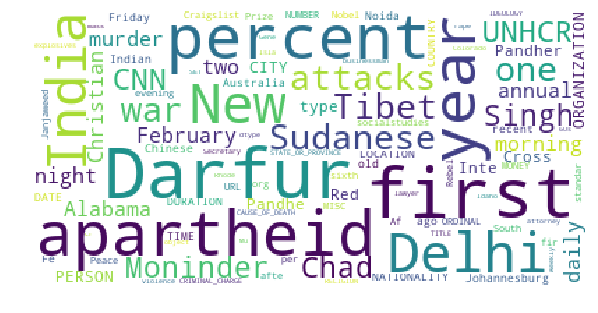

In [301]:
generate_word_cloud(str(all_ner_values), max_words=100)

In [297]:
common_ners = ['PERSON', 'ORGANIZATION', 'COUNTRY']

In [308]:
pd.Series(count_ner_train['context_ner_values']['COUNTRY']).value_counts().head(10)

U.S.             8559
United States    4247
Iraq             2846
Afghanistan      2309
Iran             2153
America          2109
China            1879
Pakistan         1848
England          1479
Mexico           1425
dtype: int64

In [307]:
pd.Series(count_ner_train['query_ner_values']['COUNTRY']).value_counts().head(10)

U.S.           351
US             179
Iraq           139
Iran            98
China           74
Afghanistan     74
Pakistan        71
UK              71
Mexico          58
India           58
dtype: int64

In [111]:
fig = px.bar(count_types_ner_df_train.reset_index().sort_values('type'), x='type', 
             y=["context_ner_count", "query_ner_count", "answer_ner_count"], 
             title="Count of NER in NewsQA train")
fig.show()

#### Longitud textos con tokenización de POS tagging

In [23]:
queries_pd_train = queries_pd.loc[queries_pd['dataset'] == 'train']
queries_pd_devtest = queries_pd.loc[queries_pd['dataset'] != 'train']

In [59]:
queries_pd_train['len_query'] = queries_pd_train['query_pos'].apply(lambda x: len(get_pos(x)))
queries_pd_train['len_context'] = queries_pd_train['context_pos'].apply(lambda x: len(get_pos(x)))
queries_pd_train['len_answer'] = queries_pd_train['answer_pos'].apply(lambda x: len(get_pos(x)))
queries_pd_devtest['len_query'] = queries_pd_devtest['query_pos'].apply(lambda x: len(get_pos(x)))
queries_pd_devtest['len_context'] = queries_pd_devtest['context_pos'].apply(lambda x: len(get_pos(x)))
queries_pd_devtest['len_answer'] = queries_pd_devtest['answer_pos'].apply(lambda x: len(get_pos(x)))

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [60]:
queries_pd_train[['len_query', 'len_context']].describe()

len_query    len_context
count  107674.000000  107674.000000
mean        7.620558     556.704794
std         3.286956     155.486379
min         0.000000      49.000000
25%         6.000000     433.000000
50%         7.000000     644.000000
75%         9.000000     684.000000
max       150.000000     738.000000

In [62]:
import numpy as np
np.mean(queries_pd_train.loc[queries_pd_train['impossible']==False, 'len_answer'])

4.223841985666842

In [63]:
queries_pd_devtest[['len_query', 'len_context']].describe()

len_query   len_context
count  11959.000000  11959.000000
mean       7.590852    551.760431
std        2.895300    156.642779
min        1.000000     80.000000
25%        6.000000    422.000000
50%        7.000000    632.000000
75%        9.000000    684.000000
max       50.000000    734.000000

In [65]:
np.mean(queries_pd_devtest.loc[queries_pd_devtest['impossible']==False, 'len_answer'])

4.264933457134014

In [70]:
queries_pd_train['query'] = queries_pd_train['query'].fillna('')
queries_pd_devtest['query'] = queries_pd_devtest['query'].fillna('')

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
queries_pd['query'] = queries_pd['query'].fillna('')
unigram_freq = queries_pd['query'].apply(lambda x: x.split(' ')[0].lower()).value_counts()
print(len(list(unigram_freq.index.values)))

4688


In [94]:
print(unigram_freq.head(10))
print(unigram_freq.head(10)/len(queries_pd_train))

what     52649
who      23002
where     8500
how       8187
when      4912
which     2590
the        997
is         991
did        814
in         762
Name: query, dtype: int64
what     0.488967
who      0.213626
where    0.078942
how      0.076035
when     0.045619
which    0.024054
the      0.009259
is       0.009204
did      0.007560
in       0.007077
Name: query, dtype: float64


In [84]:
unigram_list = ['what','who','how','when','in','which', 'where', 'the',  'why'] 
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_train),2)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

what 0.44 47448
who 0.19 20620
how 0.07 7352
when 0.04 4465
in 0.01 679
which 0.02 2329
where 0.07 7616
the 0.01 878
why 0.0 102

OTHER
16185
0.150314839236956


In [86]:
unigram_freq = queries_pd_devtest['query'].apply(lambda x: x.split(' ')[0].lower()).value_counts()
print(len(list(unigram_freq.index.values)))

739


In [88]:
unigram_list = ['what','who','how','when','in','which', 'where', 'the',  'why'] 
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

what 0.4349 5201
who 0.1992 2382
how 0.0698 835
when 0.0374 447
in 0.0069 83
which 0.0218 261
where 0.0739 884
the 0.01 119
why 0.001 12

OTHER
1735
0.14507901998494857


In [96]:
trigrams_pos_freq = queries_pd_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3])).value_counts()
trigrams_pos_freq.head(10)

WP VBZ DT     5924
WP VVD DT     5806
WP VVD NP     4208
WRB JJ NNS    3759
WP VBD DT     2994
WP VBD VVN    2481
WP VVZ DT     2390
WP VBZ NP     2233
WP VVZ NP     2012
WP NN IN      1858
Name: query_pos, dtype: int64

In [97]:
trigrams_pos_freq = queries_pd_devtest['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3])).value_counts()
trigrams_pos_freq.head(10) 

WP VBZ DT     653
WP VVD DT     627
WP VVD NP     497
WRB JJ NNS    426
WP VBD DT     325
WP VVZ DT     305
WP VBD VVN    290
WP VBZ NP     262
WP VVZ NP     241
WRB VBD DT    226
Name: query_pos, dtype: int64

In [55]:
#queries_pd_devtest['query_trigrams'] = queries_pd_devtest['query'].apply(lambda x: ' '.join(x.split(' ')[0:3]))
queries_pd_devtest['query'] = queries_pd_devtest['query'].fillna('')
queries_pd_devtest['query_trigrams'] = queries_pd_devtest['query'].apply(lambda x: ' '.join(x.split(' ')[0:3]))
queries_pd_devtest['query_trigrams_pos'] = queries_pd_devtest['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3]))
queries_pd_devtest['query_cuatrigrams'] = queries_pd_devtest['query'].apply(lambda x: ' '.join(x.split(' ')[0:4]))
queries_pd_devtest['query_cuatrigrams_pos'] = queries_pd_devtest['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:4]))

queries_pd_train['query'] = queries_pd_train['query'].fillna('')
queries_pd_train['query_trigrams'] = queries_pd_train['query'].apply(lambda x: ' '.join(x.split(' ')[0:3]))
queries_pd_train['query_trigrams_pos'] = queries_pd_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3]))
queries_pd_train['query_cuatrigrams'] = queries_pd_train['query'].apply(lambda x: ' '.join(x.split(' ')[0:4]))
queries_pd_train['query_cuatrigrams_pos'] = queries_pd_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:4]))

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [50]:
#print(queries_pd_devtest.loc[(queries_pd_devtest['query_trigrams_pos']=='WRB JJ NNS') &
#                (queries_pd_devtest['query_trigrams']!='Wht is the'), 'query_trigrams'].unique().tolist())

In [112]:
unigram_freq = queries_pd_train['query_trigrams_pos'].value_counts()
unigram_list = ['WP VBZ DT', 'WDT IN DT', 'WP VBD DT', 'WP NN IN', 'WP VVD DT', 'IN WP NN', 'WP VVD NP', 'VVG TO DT', 'WRB JJ NNS', 'IN DT NN', 'PP MD VV', 'WP MD PP', 'WP NN VVD', 'WP VBD VVN', 'WP VVZ DT', 'WP VBZ NP', 'WRB VVD NP', 'WP VVZ NP', 'WRB VBD DT', 'DT NN VVZ', 'DT JJ NN', 'DT NN VBZ', 'DT NN IN']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    try:
        unigram_num += unigram_freq[element]
        print(element, str(round(unigram_freq[element]/len(queries_pd_train),4)), str(unigram_freq[element]))
    except:
        print(element, 0)
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

WP VBZ DT 0.0549 5910
WDT IN DT 0.0 5
WP VBD DT 0.0278 2991
WP NN IN 0.0172 1855
WP VVD DT 0.0538 5789
IN WP NN 0.0074 796
WP VVD NP 0.0389 4186
VVG TO DT 0.0005 53
WRB JJ NNS 0.0349 3758
IN DT NN 0.0006 62
PP MD VV 0.0001 16
WP MD PP 0.0028 303
WP NN VVD 0.0121 1307
WP VBD VVN 0.023 2479
WP VVZ DT 0.0221 2380
WP VBZ NP 0.0206 2223
WRB VVD NP 0.0078 843
WP VVZ NP 0.0185 1991
WRB VBD DT 0.0168 1812
DT NN VVZ 0.0008 87
DT JJ NN 0.0013 136
DT NN VBZ 0.001 108
DT NN IN 0.0012 127

OTHER
68457
0.6357802254954771


In [57]:
unigram_freq = queries_pd_devtest['query_trigrams_pos'].value_counts()
unigram_list = ['WP VBZ DT', 'WDT IN DT', 'WP VBD DT', 'WP NN IN', 'WP VVD DT', 'IN WP NN', 'WP VVD NP', 'VVG TO DT', 'WRB JJ NNS', 'IN DT NN', 'PP MD VV', 'WP MD PP', 'WP NN VVD', 'WP VBD VVN', 'WP VVZ DT', 'WP VBZ NP', 'WRB VVD NP', 'WP VVZ NP', 'WRB VBD DT', 'DT NN VVZ', 'DT JJ NN', 'DT NN VBZ', 'DT NN IN']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    try:
        unigram_num += unigram_freq[element]
        print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
    except:
        print(element, 0)
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

WP VBZ DT 0.0544 650
WDT IN DT 0.0001 1
WP VBD DT 0.0272 325
WP NN IN 0.0161 192
WP VVD DT 0.0523 626
IN WP NN 0.0071 85
WP VVD NP 0.0415 496
VVG TO DT 0.0002 2
WRB JJ NNS 0.0356 426
IN DT NN 0.0008 9
PP MD VV 0.0005 6
WP MD PP 0.003 36
WP NN VVD 0.0103 123
WP VBD VVN 0.0242 290
WP VVZ DT 0.0253 303
WP VBZ NP 0.0218 261
WRB VVD NP 0.0069 82
WP VVZ NP 0.0201 240
WRB VBD DT 0.0189 226
DT NN VVZ 0.0013 15
DT JJ NN 0.0008 10
DT NN VBZ 0.0012 14
DT NN IN 0.0009 11

OTHER
7530
0.629651308637846


In [61]:
queries_pd_train['query_cuatrigrams_pos'].value_counts().head(20)

WP VBZ DT NN      4070
WP VVD DT NN      3275
WP VBD DT NN      1992
WP VVZ DT NN      1451
WP VVD NP NP      1359
WP VBD VVN IN     1253
WRB VBD DT NN     1115
WP VBZ NP NP      1091
WRB JJ NNS VBD    1013
WP VBZ DT JJ       976
WP VVD NP VVP      957
WRB VVD DT NN      949
WP VVD DT NNS      823
WP NN IN NN        778
WP VVD DT JJ       770
WP VVD DT NP       711
WP NN IN NNS       702
WP VVZ NP VV       675
WRB VBZ DT NN      667
WRB JJ NNS VVD     628
Name: query_cuatrigrams_pos, dtype: int64

In [60]:
queries_pd_devtest['query_cuatrigrams_pos'].value_counts().head(20)

WP VBZ DT NN      461
WP VVD DT NN      355
WP VBD DT NN      217
WP VVZ DT NN      169
WP VBD VVN IN     164
WP VVD NP NP      144
WRB VBD DT NN     136
WP VBZ NP NP      131
WRB JJ NNS VBD    123
WP VVD NP VVP     122
WRB VVD DT NN     113
WP VBZ DT JJ      102
WP VVD DT NNS      91
WP VVD DT NP       83
WP NN IN NN        79
WP VVZ NP VV       79
WRB VBZ DT NN      77
WP VVZ NP NP       75
WP NN IN NNS       74
WRB JJ NNS VVD     73
Name: query_cuatrigrams_pos, dtype: int64

In [73]:
queries_pd_train['query_all_pos'] = queries_pd_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)))

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
queries_pd_train['query_all_pos'].value_counts()

WP VVD DT NN SENT                      538
WP VBZ NP NP SENT                      492
WP VBD VVN SENT                        445
WP VBZ DT NN IN DT NN SENT             401
WRB JJ NNS VBD VVN SENT                363
                                      ... 
VVP JJ NNS VVP NP MD VV NN SENT          1
WP VBZ VVG DT JJS NNS IN DT NN SENT      1
WRB VBD NP NN IN SENT                    1
WRB JJ NNS VHZ DT NN VHD SENT            1
WP JJ NN VVD DT JJ NN SENT               1
Name: query_all_pos, Length: 62069, dtype: int64

In [65]:
queries_pd_train.loc[queries_pd_train['query_all_pos']=='WP VVD DT NN SENT', 'query'].head()

150    Who abandoned the marriage?
358      Who degraded the country?
430          What caused the fire?
618         Who rescued the diver?
743        Who produced the movie?
Name: query, dtype: object

In [76]:
unigram_freq = queries_pd_train['query_all_pos'].value_counts()
unigram_list = ['WP VVZ NP VV IN SENT', 'WP VBD NP POS NN SENT', 'WP VVD DT NN SENT', 'WP VBZ NP NP SENT', 'WP VBZ DT JJS NN IN DT NN SENT']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

WP VVZ NP VV IN SENT 0.0006 66
WP VBD NP POS NN SENT 0.0005 58
WP VVD DT NN SENT 0.005 538
WP VBZ NP NP SENT 0.0046 492
WP VBZ DT JJS NN IN DT NN SENT 0.0001 6

OTHER
106514
0.989226739974367


In [64]:
queries_pd_devtest['query_all_pos'] = queries_pd_devtest['query_pos'].apply(lambda x: ' '.join(get_pos(x)))
queries_pd_devtest['query_all_pos'].value_counts()

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



WP VVD DT NN SENT                                                                                         64
WP VBZ NP NP SENT                                                                                         58
WP VBZ DT NN IN DT NN SENT                                                                                51
WP VBD VVN SENT                                                                                           44
WP VVD NP VVP SENT                                                                                        42
                                                                                                          ..
NP VVZ NP `` IN RB JJ NNS VVD JJ NN JJ `` NP NP  NP NN DT NN IN NP POS NN NN IN NP RB VVZ DT NN VVG NN     1
IN WP NN VVD NP VV DT NN SENT                                                                              1
VBD NN VVN TO DT NN SENT                                                                                   1
WP NN IN JJ NNS SEN

In [66]:
queries_pd_devtest.loc[queries_pd_devtest['query_all_pos']=='WP VVD DT NN SENT', 'query'].head()

1552     Who made the documentary?
2165            Who owned the bus?
3549       Who produced the album?
7009        What killed the woman?
10042        Who signed the order?
Name: query, dtype: object

In [75]:
unigram_freq = queries_pd_devtest['query_all_pos'].value_counts()
unigram_list = ['WP VVZ NP VV IN SENT', 'WP VBD NP POS NN SENT', 'WP VVD DT NN SENT', 'WP VBZ NP NP SENT', 'WP VBZ DT JJS NN IN DT NN SENT']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

WP VVZ NP VV IN SENT 0.0009 11
WP VBD NP POS NN SENT 0.0012 14
WP VVD DT NN SENT 0.0054 64
WP VBZ NP NP SENT 0.0048 58
WP VBZ DT JJS NN IN DT NN SENT 0.0001 1

OTHER
11811
0.9876243833096413


In [322]:
queries_pd_train['answer_red_pos'] = queries_pd_train['answer_pos'].apply(lambda x: ' '.join(get_pos(x)))
queries_pd_train['answer_pral_pos'] = queries_pd_train['answer_red_pos'].apply(lambda x: pral_pos(x))
queries_pd_train['answer_pral_pos'].value_counts()

queries_pd_devtest['answer_red_pos'] = queries_pd_devtest['answer_pos'].apply(lambda x: ' '.join(get_pos(x)))
queries_pd_devtest['answer_pral_pos'] = queries_pd_devtest['answer_red_pos'].apply(lambda x: pral_pos(x))
queries_pd_devtest['answer_pral_pos'].value_counts()

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

NP    4568
      2962
JJ    1801
NN    1104
CD     734
V      699
R       91
Name: answer_pral_pos, dtype: int64

In [324]:
unigram_freq = queries_pd_train['answer_pral_pos'].value_counts()
unigram_list = ['NP','NN','JJ', 'CD','V','R']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

NP 0.3741 40276
NN 0.0918 9880
JJ 0.152 16364
CD 0.0629 6775
V 0.0606 6527
R 0.008 864

OTHER
26988
0.25064546687222544


In [325]:
unigram_freq = queries_pd_devtest['answer_pral_pos'].value_counts()
unigram_list = ['NP','NN','JJ', 'CD','V','R']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

NP 0.382 4568
NN 0.0923 1104
JJ 0.1506 1801
CD 0.0614 734
V 0.0584 699
R 0.0076 91

OTHER
2962
0.24767957187055775


### Obtener foco de la pregunta

In [24]:
queries_pd_train['foco'] = queries_pd_train.apply(lambda x: obtener_foco(get_word_pos(x['query_pos']), get_pos(x['query_pos'])), axis=1)
queries_pd_train['foco'].value_counts().head(30)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



person        20906
place          7725
time           4673
people         1481
name           1217
                963
number          869
country         768
age             600
kind            574
Obama           544
did             457
reason          432
year            432
police          425
type            406
quantity        394
his             380
U.S.            316
city            313
group           279
state           276
years           269
Whose           267
company         254
team            243
man             233
children        224
government      219
president       218
Name: foco, dtype: int64

In [26]:
unigram_freq = queries_pd_train['foco'].value_counts()
unigram_list = ['person','number', 'time','place','year','name','type', 'people', 'country', 'percentage', 'kind', 'age'] 
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

person 0.1942 20906
number 0.0081 869
time 0.0434 4673
place 0.0717 7725
year 0.004 432
name 0.0113 1217
type 0.0038 406
people 0.0138 1481
country 0.0071 768
percentage 0.0018 196
kind 0.0053 574
age 0.0056 600

OTHER
67827
0.6299292308263833


In [27]:
queries_pd_devtest['foco'] = queries_pd_devtest.apply(lambda x: obtener_foco(get_word_pos(x['query_pos']), get_pos(x['query_pos'])), axis=1)
queries_pd_devtest['foco'].value_counts().head(30)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



person        2406
place          892
time           472
people         172
name           145
country         98
                87
number          85
age             61
kind            58
police          53
Obama           53
reason          53
did             50
his             48
quantity        47
type            41
year            41
Whose           41
U.S.            40
president       33
group           33
day             30
city            30
percentage      30
countries       29
her             28
team            27
years           27
man             26
Name: foco, dtype: int64

In [29]:
unigram_freq = queries_pd_devtest['foco'].value_counts()
unigram_list = ['person','number', 'time','place','year','name','type', 'people', 'country', 'percentage', 'kind', 'age'] 
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

person 0.2012 2406
number 0.0071 85
time 0.0395 472
place 0.0746 892
year 0.0034 41
name 0.0121 145
type 0.0034 41
people 0.0144 172
country 0.0082 98
percentage 0.0025 30
kind 0.0048 58
age 0.0051 61

OTHER
7458
0.6236307383560499


In [310]:
queries_pd_train.head()

id  \
0  0-42d01e187213e86f5fe617fe32e716ff7fa3afc4.story   
1  1-c48228a52f26aca65c31fad273e66164f047f292.story   
2  2-c65ed85800e4535f4bbbfa2c34d7d9630358d303.story   
3  3-0cf66b646e9b32076513c050edf32a799200c3c2.story   
4  4-13012604e3203c18df09289dfedd14cde67cf40b.story   

                                               query  \
0          What was the amount of children murdered?   
1                     Where was one employee killed?   
2  who did say South Africa did not issue a visa ...   
3            How many years old was the businessman?   
4                      What frightened the families?   

                                              answer  impossible  \
0                                                 19       False   
1                          Sudanese region of Darfur       False   
2                            Archbishop Desmond Tutu       False   
3                                        29-year-old       False   
4  a series of killings and threats by Muslim ext...       False   

                                           plausible dataset  \
0                                                NaN   train   
1                                            Seleia,   train   
2                                      his spokesman   train   
3                                                NaN   train   
4  series of killings and threats by Muslim extre...   train   

                                             context  \
0  NEW DELHI, India (CNN) -- A high court in nort...   
1  (CNN) -- Fighting in the volatile Sudanese reg...   
2  Johannesburg (CNN) -- Miffed by a visa delay t...   
3  (CNN)  -- England international footballer Ste...   
4  BAGHDAD, Iraq (CNN)  -- At least 6,000 Christi...   

                                           query_ner  \
0                                                 {}   
1                                {'NUMBER': ['one']}   
2                      {'COUNTRY': ['South Africa']}   
3  {'DURATION': ['years'], 'TITLE': ['businessman']}   
4                                                 {}   

                                         context_ner  \
0  {'CITY': ['NEW DELHI', 'New Delhi'], 'COUNTRY'...   
1  {'ORGANIZATION': ['CNN', 'Red Cross', 'U.N.', ...   
2  {'CITY': ['Johannesburg', 'New Delhi', 'Beijin...   
3  {'ORGANIZATION': ['CNN', 'Liverpool Crown Cour...   
4  {'CITY': ['BAGHDAD', 'Baghdad'], 'COUNTRY': ['...   

                                          answer_ner  ...  \
0                                 {'NUMBER': ['19']}  ...   
1  {'NATIONALITY': ['Sudanese'], 'LOCATION': ['Da...  ...   
2  {'TITLE': ['Archbishop'], 'PERSON': ['Desmond ...  ...   
3                      {'DURATION': ['29 year old']}  ...   
4                  {'RELIGION': ['Muslim', 'Islam']}  ...   

  phiyodr/roberta-large-finetuned-squad2 valhalla/t5-base-squad  \
0                                    NaN                    NaN   
1                                    NaN                    NaN   
2                                    NaN                    NaN   
3                                    NaN                    NaN   
4                                    NaN                    NaN   

  tli8hf/unqover-roberta-large-newsqa len_query len_context len_answer  \
0                                 NaN         8         259          1   
1                                 NaN         6         476          4   
2                                 NaN        13         691          3   
3                                 NaN         8         469          1   
4                                 NaN         5         425         19   

        query_trigrams query_trigrams_pos              query_cuatrigrams  \
0         What was the          WP VBD DT            What was the amount   
1        Where was one         WRB VBD CD         Where was one employee   
2          who did say         WP VVD VVP              who did say South   
3       How many years         WRB JJ NNS             How

In [326]:
queries_pd_train.columns

Index(['id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'context_ner', 'answer_ner', 'plausible_ner',
       'query_pos', 'answer_pos', 'plausible_pos', 'context_pos', 'foco',
       'tli8hf/unqover-bert-base-uncased-newsqa',
       'tli8hf/unqover-bert-large-uncased-newsqa',
       'tli8hf/unqover-roberta-base-newsqa',
       'phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/roberta-large-finetuned-squad2', 'valhalla/t5-base-squad',
       'tli8hf/unqover-roberta-large-newsqa', 'len_query', 'len_context',
       'len_answer', 'query_trigrams', 'query_trigrams_pos',
       'query_cuatrigrams', 'query_cuatrigrams_pos', 'answer_red_pos',
       'answer_pral_pos'],
      dtype='object')

In [136]:
queries_pd_train.to_excel('datasets/newsqa/models/NER-POS-F-NEWSQA-train-queries.xlsx', index=False)

In [137]:
queries_pd_devtest.to_excel('datasets/newsqa/models/NER-POS-F-NEWSQA-dev-test-queries.xlsx', index=False)

In [311]:
queries_pd_devtest.head()

id  \
8     8-d191e20468fc7675fcfa55c33fab1e65405740a0.story   
56   56-289a45e715707cf650352f3eaa123f85d3653d4b.story   
76   76-6e8382e61be49c936e00a8eea24377a687622967.story   
113  113-bce33bb5b5cff6b93065aa0cf91917c8dd36ac78.s...   
119  119-017df5c4fe1e79eb26957ff6a8b4c1e41cd966ac.s...   

                                                 query  \
8                                 Iran criticizes who?   
56                      What is going live on Tuesday?   
76            What should you do with your own videos?   
113  What was the space station crew forced to take...   
119  for what People just don't trust their instincts?   

                                                answer  impossible  \
8                    U.S. President-elect Barack Obama        True   
56    Web-based on-demand television and movie service       False   
76                                                 NaN        True   
113                                  a piece of debris       False   
119  and they're not willing to take a risk. Have f...        True   

              plausible dataset  \
8                   NaN     dev   
56   Fancast XFINITY TV    test   
76                  NaN     dev   
113                 NaN    test   
119                 NaN    test   

                                               context              query_ner  \
8    TEHRAN, Iran (CNN) -- Iran's parliament speake...  {'COUNTRY': ['Iran']}   
56   (CNN) -- Comcast rolled out a Web-based on-dem...  {'DATE': ['Tuesday']}   
76   (CNN) -- What could be more powerful than the ...                     {}   
113  (CNN) -- NASA won't have to maneuver the inter...                     {}   
119  (CNN) -- Decorating in the midst of a financia...                     {}   

                                           context_ner  \
8    {'LOCATION': ['TEHRAN', 'Persian Gulf', 'Repub...   
56   {'ORGANIZATION': ['CNN Comcast', 'Comcast', 'C...   
76   {'MISC': ['Native', 'Keep', 'Beautiful', 'Nati...   
113  {'ORGANIZATION': ['CNN NASA', 'NASA', 'Johnson...   
119  {'ORGANIZATION': ['CNN', 'Dress My Nest', 'CNN...   

                                            answer_ner  ...  \
8    {'COUNTRY': ['U.S.'], 'TITLE': ['President'], ...  ...   
56                                                  {}  ...   
76                                                  {}  ...   
113                                                 {}  ...   
119                                                 {}  ...   

                phiyodr/roberta-large-finetuned-squad2  \
8                                                  NaN   
56   {'score': 0.9454475045204163, 'start': 3360, '...   
76                                                 NaN   
113  {'score': 0.7144440412521362, 'start': 2783, '...   
119  {'score': 0.5803229808807373, 'start': 4542, '...   

          valhalla/t5-base-squad  \
8                            NaN   
56            Fancast XFINITY TV   
76                           NaN   
113                       debris   
119  home decorating on a budget   

                   tli8hf/unqover-roberta-large-newsqa len_query len_context  \
8                                                  NaN         4         524   
56   {'score': 0.4652361571788788, 'start': 3350, '...         7         639   
76                                                 NaN         8         304   
113  {'score': 0.0878596231341362, 'start': 2783, '...        12         483   
119  {'score': 0.21265746653079987, 'start': 4554, ...         9         702   

    len_answer        query_trigrams query_trigrams_pos     query_cuatrigrams  \
8            4  Iran criticizes who?          NP VVZ WP  Iran criticizes who?   
56           6         What is going         WP VBZ VVG    What is going live   
76           0       What should you           WP MD PP    What should you do   
113          4          What was the          WP VBD DT    What was the space   
119         20       for what People          IN WP NNS

##### Validacion tipo foco y entidad respuesta

In [32]:
queries_pd_train['answer_ner_tags'] = queries_pd_train['answer_ner'].apply(lambda x: str(get_ner_tags(load_data(x))))
queries_pd_devtest['answer_ner_tags'] = queries_pd_devtest['answer_ner'].apply(lambda x: str(get_ner_tags(load_data(x))))

Invalid \escape: line 1 column 24 (char 23)
{"PERSON": ["Alan GarcÃ\xada", "Bachelet", "Edwin Donayre"], "DATE": ["last week"], "TITLE": ["Gen."]}


c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
print(sum(queries_pd_train.loc[queries_pd_train['foco'] == 'person', 'answer_ner_tags'].value_counts()))
queries_pd_train.loc[queries_pd_train['foco'] == 'person', 'answer_ner_tags'].value_counts()

20906


['PERSON']                                                                                                         8868
[]                                                                                                                 5232
['ORGANIZATION']                                                                                                   1242
['TITLE', 'PERSON']                                                                                                 901
['COUNTRY']                                                                                                         660
                                                                                                                   ... 
['LOCATION', 'NUMBER']                                                                                                1
['CAUSE_OF_DEATH', 'PERSON']                                                                                          1
['ORGANIZATION', 'IDEOLOGY', 'COUNTRY', 

In [33]:
queries_pd_train['answer'] = queries_pd_train['answer'].fillna('')
queries_pd_train['validation_foco_ner'] = queries_pd_train[['foco', 'answer_ner_tags', 'answer']].apply(lambda x: validate_foco_ner(x.foco, x.answer_ner_tags, x.answer), axis=1)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
queries_pd_train['answer'] = queries_pd_train['answer'].fillna('')
queries_pd_train['validation_foco_ner'] = queries_pd_train[['foco', 'answer_ner_tags', 'answer']].apply(lambda x: validate_foco_ner(x.foco, x.answer_ner_tags, x.answer), axis=1)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
queries_pd_train.loc[queries_pd_train['answer_ner_tags'].isna(), 'validation_foco_ner'] = 'NA'
queries_pd_train.loc[queries_pd_train['answer_ner_tags']=='[]', 'validation_foco_ner'] = 'NA'

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
queries_pd_train['validation_foco_ner'].value_counts()

NA                 48903
KO                 27136
OK-PERSON          10830
OK-NUMBER           5624
OK-PERSON-ORG       5011
OK-LOC              4827
OK-TIME             4305
OK-COUNTRY           543
OK-CITY              148
OK-MONEY             103
OK-DATE               93
OK-NATIONALITY        72
OK-ORGANIZATION       37
OK-RELIGION           13
OK-PERCENT             9
OK-TITLE               8
OK-LOCATION            7
OK-DURATION            4
OK-IDEOLOGY            1
Name: validation_foco_ner, dtype: int64

In [41]:
unigram_list = ['OK-PERSON', 'OK-ORGANIZATION', 'OK-PERSON-ORG',
                'OK-TITLE', 'OK-NATIONALITY', 'OK-RELIGION', 'OK-IDEOLOGY',
                'OK-LOC','OK-COUNTRY','OK-LOCATION', 'OK-CITY',
                'OK-DATE', 'OK-TIME', 'OK-DURATION',
                'OK-NUMBER','OK-PERCENT', 'OK-MONEY', 
                #'OK-URL', #'OK-MISC',
                'KO', 'NA']

unigram_freq = queries_pd_train['validation_foco_ner'].value_counts()
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

OK-PERSON 0.1006 10830
OK-ORGANIZATION 0.0003 37
OK-PERSON-ORG 0.0465 5011
OK-TITLE 0.0001 8
OK-NATIONALITY 0.0007 72
OK-RELIGION 0.0001 13
OK-IDEOLOGY 0.0 1
OK-LOC 0.0448 4827
OK-COUNTRY 0.005 543
OK-LOCATION 0.0001 7
OK-CITY 0.0014 148
OK-DATE 0.0009 93
OK-TIME 0.04 4305
OK-DURATION 0.0 4
OK-NUMBER 0.0522 5624
OK-PERCENT 0.0001 9
OK-MONEY 0.001 103
KO 0.252 27136
NA 0.4542 48903

OTHER
0
0.0


In [34]:
queries_pd_devtest['answer'] = queries_pd_devtest['answer'].fillna('')
queries_pd_devtest['validation_foco_ner'] = queries_pd_devtest[['foco', 'answer_ner_tags', 'answer']].apply(lambda x: validate_foco_ner(x.foco, x.answer_ner_tags, x.answer), axis=1)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
queries_pd_devtest.loc[queries_pd_devtest['answer_ner_tags'].isna(), 'validation_foco_ner'] = 'NA'
queries_pd_devtest.loc[queries_pd_devtest['answer_ner_tags']=='[]', 'validation_foco_ner'] = 'NA'

In [49]:
unigram_list = ['OK-PERSON', 'OK-ORGANIZATION', 'OK-PERSON-ORG',
                #'OK-TITLE', 
                'OK-NATIONALITY', 'OK-RELIGION', #'OK-IDEOLOGY',
                'OK-LOC','OK-COUNTRY',#'OK-LOCATION',
                'OK-CITY',
                'OK-DATE', 'OK-TIME', #'OK-DURATION',
                'OK-NUMBER','OK-PERCENT', 'OK-MONEY', 
                #'OK-URL', #'OK-MISC',
                'KO', 'NA']

unigram_freq = queries_pd_devtest['validation_foco_ner'].value_counts()
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

OK-PERSON 0.1065 1274
OK-ORGANIZATION 0.0004 5
OK-PERSON-ORG 0.0456 545
OK-NATIONALITY 0.0007 8
OK-RELIGION 0.0003 3
OK-LOC 0.0439 525
OK-COUNTRY 0.0059 70
OK-CITY 0.0015 18
OK-DATE 0.0008 9
OK-TIME 0.0356 426
OK-NUMBER 0.0549 656
OK-PERCENT 0.0001 1
OK-MONEY 0.0008 10
KO 0.2544 3042
NA 0.4488 5367

OTHER
0
0.0


In [122]:
queries_pd_devtest['answer_ner_tags_processed'] = queries_pd_devtest['answer_ner_tags'].apply(lambda x: len([x for x in str(x).replace('"','').replace("'",'').split(', ') if x and x!='[]']))
queries_pd_train['answer_ner_tags_processed'] = queries_pd_train['answer_ner_tags'].apply(lambda x: len([x for x in str(x).replace('"','').replace("'",'').split(', ') if x and x!='[]']))

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
def marca_multiple_ninguna_ner(tipo_ner, number_ner, impossible):
    if impossible:
        return 'NO RESP'
    if number_ner == 0:
        return 'SIN NER'
    if number_ner == 1:
        return str(tipo_ner).replace('[','').replace(']','').replace("'",'')
    else:
        return 'MULTI'

In [124]:
queries_pd_devtest['answer_ner_tags_processed'] = queries_pd_devtest[['answer_ner_tags', 'answer_ner_tags_processed', 'impossible']].apply(lambda x: marca_multiple_ninguna_ner(x[0], x[1], x[2]), axis=1)
queries_pd_train['answer_ner_tags_processed'] = queries_pd_train[['answer_ner_tags', 'answer_ner_tags_processed', 'impossible']].apply(lambda x: marca_multiple_ninguna_ner(x[0], x[1], x[2]), axis=1)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
print(queries_pd_train['answer_ner_tags_processed'].value_counts())
print(100*queries_pd_train['answer_ner_tags_processed'].value_counts() / len(queries_pd_train))

NO RESP              50464
SIN NER              18681
PERSON                9181
MULTI                 7363
NUMBER                6299
DATE                  2901
COUNTRY               2278
ORGANIZATION          2005
DURATION              1110
MONEY                  936
CAUSE_OF_DEATH         910
CITY                   895
NATIONALITY            829
TITLE                  792
STATE_OR_PROVINCE      644
LOCATION               619
CRIMINAL_CHARGE        497
MISC                   333
ORDINAL                262
PERCENT                208
IDEOLOGY               189
RELIGION               106
TIME                    68
URL                     53
SET                     48
HANDLE                   3
Name: answer_ner_tags_processed, dtype: int64
NO RESP              46.867396
SIN NER              17.349592
PERSON                8.526664
MULTI                 6.838234
NUMBER                5.850066
DATE                  2.694244
COUNTRY               2.115645
ORGANIZATION          1.862102
DURA

In [126]:
print(queries_pd_devtest['answer_ner_tags_processed'].value_counts())
print(100*queries_pd_devtest['answer_ner_tags_processed'].value_counts() / len(queries_pd_devtest))

NO RESP              5497
SIN NER              2071
PERSON               1050
MULTI                 847
NUMBER                716
DATE                  293
COUNTRY               279
ORGANIZATION          204
MONEY                 118
NATIONALITY           111
CITY                  107
CAUSE_OF_DEATH        100
TITLE                  98
DURATION               95
LOCATION               73
STATE_OR_PROVINCE      73
CRIMINAL_CHARGE        60
MISC                   42
PERCENT                35
ORDINAL                23
IDEOLOGY               20
RELIGION               20
TIME                   14
SET                     8
URL                     5
Name: answer_ner_tags_processed, dtype: int64
NO RESP              45.965382
SIN NER              17.317501
PERSON                8.779998
MULTI                 7.082532
NUMBER                5.987123
DATE                  2.450038
COUNTRY               2.332971
ORGANIZATION          1.705828
MONEY                 0.986705
NATIONALITY           0.9

In [127]:
def get_ner_count(ner_dict, specific_ner):
    if ner_dict and specific_ner in ner_dict.keys():
        return len(ner_dict[specific_ner])
    return 0

def entidades_posibles_contexto(tipo_ner, context_ner):
    return get_ner_count(load_data(context_ner), tipo_ner)

In [7]:
queries_pd_train['context_ner_tags_answer'] = queries_pd_train[['answer_ner_tags_processed', 'context_ner']].apply(lambda x: entidades_posibles_contexto(x[0], x[1]), axis=1)
queries_pd_devtest['context_ner_tags_answer'] = queries_pd_devtest[['answer_ner_tags_processed', 'context_ner']].apply(lambda x: entidades_posibles_contexto(x[0], x[1]), axis=1)

In [132]:
queries_pd_train.loc[queries_pd_train['answer_ner_tags_processed'] == 'HANDLE', ['query', 'answer', 'answer_ner']]

query  \
28428  What is the Twitter username being placed up f...   
68247                What is Qwikster's Twitter handler?   
74030                        does netflix own @quikster?   

                                         answer                 answer_ner  
28428                                   "@drew"      {'HANDLE': ['@drew']}  
68247                                 @Qwikster  {'HANDLE': ['@Qwikster']}  
74030  @Qwikster apparently isn't controlled by  {'HANDLE': ['@Qwikster']}

In [129]:
queries_pd_train[['answer_ner_tags_processed', 'context_ner_tags_answer']].groupby(['answer_ner_tags_processed']).mean()

context_ner_tags_answer
answer_ner_tags_processed                         
CAUSE_OF_DEATH                           10.091209
CITY                                      7.598883
COUNTRY                                  14.595259
CRIMINAL_CHARGE                           5.702213
DATE                                     12.022751
DURATION                                  5.340541
HANDLE                                    9.666667
IDEOLOGY                                  8.185185
LOCATION                                  8.775444
MISC                                      7.069069
MONEY                                     6.039530
MULTI                                     0.000000
NATIONALITY                               8.360676
NO RESP                                   0.000000
NUMBER                                   11.716304
ORDINAL                                   4.843511
ORGANIZATION                             15.519701
PERCENT                                   4.855769
PERSON                                   22.899357
RELIGION                                  7.415094
SET                                       2.395833
SIN NER                                   0.000000
STATE_OR_PROVINCE                         7.720497
TIME                                      4.514706
TITLE                                    11.212121
URL                                       4.641509

In [130]:
queries_pd_devtest[['answer_ner_tags_processed', 'context_ner_tags_answer']].groupby(['answer_ner_tags_processed']).mean()

context_ner_tags_answer
answer_ner_tags_processed                         
CAUSE_OF_DEATH                            9.110000
CITY                                      7.915888
COUNTRY                                  15.394265
CRIMINAL_CHARGE                           6.183333
DATE                                     11.645051
DURATION                                  4.831579
IDEOLOGY                                  3.550000
LOCATION                                  7.109589
MISC                                      5.809524
MONEY                                     6.271186
MULTI                                     0.000000
NATIONALITY                               8.702703
NO RESP                                   0.000000
NUMBER                                   11.843575
ORDINAL                                   4.347826
ORGANIZATION                             14.578431
PERCENT                                   5.428571
PERSON                                   22.540000
RELIGION                                  8.300000
SET                                       1.250000
SIN NER                                   0.000000
STATE_OR_PROVINCE                         7.493151
TIME                                      4.142857
TITLE                                     9.948980
URL                                       1.400000

In [133]:
queries_pd_train['num_common_terms'] = queries_pd_train.apply(lambda x: len(set(get_word_pos(x['query_pos'].lower())).intersection(set(get_word_pos(x['context_pos'].lower())))), axis=1)
queries_pd_devtest['num_common_terms'] = queries_pd_devtest.apply(lambda x: len(set(get_word_pos(x['query_pos'].lower())).intersection(set(get_word_pos(x['context_pos'].lower())))), axis=1)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
queries_pd_train['num_common_terms'].describe()

count    107674.000000
mean          5.813075
std           2.906668
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          53.000000
Name: num_common_terms, dtype: float64

In [135]:
queries_pd_devtest['num_common_terms'].describe()

count    11959.000000
mean         5.785015
std          2.751944
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         44.000000
Name: num_common_terms, dtype: float64